# Hydrogen Fusion Energy Generation

Figure 5.8 from Chapter 5 of *Stellar Structure & Evolution* Pinsonneault & Ryden, Cambridge University Press.

Plot of the specific energy generation rate versus temperature in the Sun for pp and CNO cycles.

In [1]:
%matplotlib inline

import os, sys, math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [2]:
plotFile = 'Fig5_8.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Energy generation calculation

Assumes $\rho$=160 g/cc, X=0.34, and X$_{CNO}$=0.01, and adopts a solar core temperature of 15.7 Million K from the BP2004 Solar model.

In [3]:
minT6 = 3.0 # minimum T in units of 10^6 K
maxT6 = 40.0 # max temp

numPts = 1+int((maxT6-minT6)/0.1)

# Temperature in units of millions of K

T6 = np.linspace(minT6,maxT6,numPts)

# Temperature at the Sun's center

T6sun = 15.7 # Million K

### p-p Chain

The p-p reaction rate is approximated numerically as a combination of power laws, polynomials, and exponentials, as described in the book.

In [4]:
# p-p specific energy generation rate

f11 = np.exp(1.872/T6**(2./3.))
g11 = 1.0 + 0.00382*T6 + 1.51e-6*T6**2.0 + 1.44e-10*T6**3.0 - 1.14e-14*T6**4.0
pp = 6.655e7*f11*g11/T6**(2.0/3.0)*np.exp(-33.81/T6**(1.0/3.0))

### CNO Cycle

In [5]:
# CNO specific energy generation rate

g141 = 1.0 - 0.002*T6 + 3.41e-6*T6**2.0 - 2.43e-9*T6**3.0
cno = 4.483e27*g141/T6**(2.0/3.0)*np.exp(-152.31/T6**(1.0/3.0)-(T6/800.0)**2.0)

## Figure 5.8

Plot the specific energy generation rate versus temperature, for the pp chains (solid line) and
CNO bi-cycle (dashed line). Plot the solar core temperature as a vertical dotted line.

While computation was done in units of 10<sup>6</sup>K, an editorial decision was made to plot
in units of T<sup>7</sup>K, so we have to apply a little sleight of hand to make the X-axis come
out the way we want.

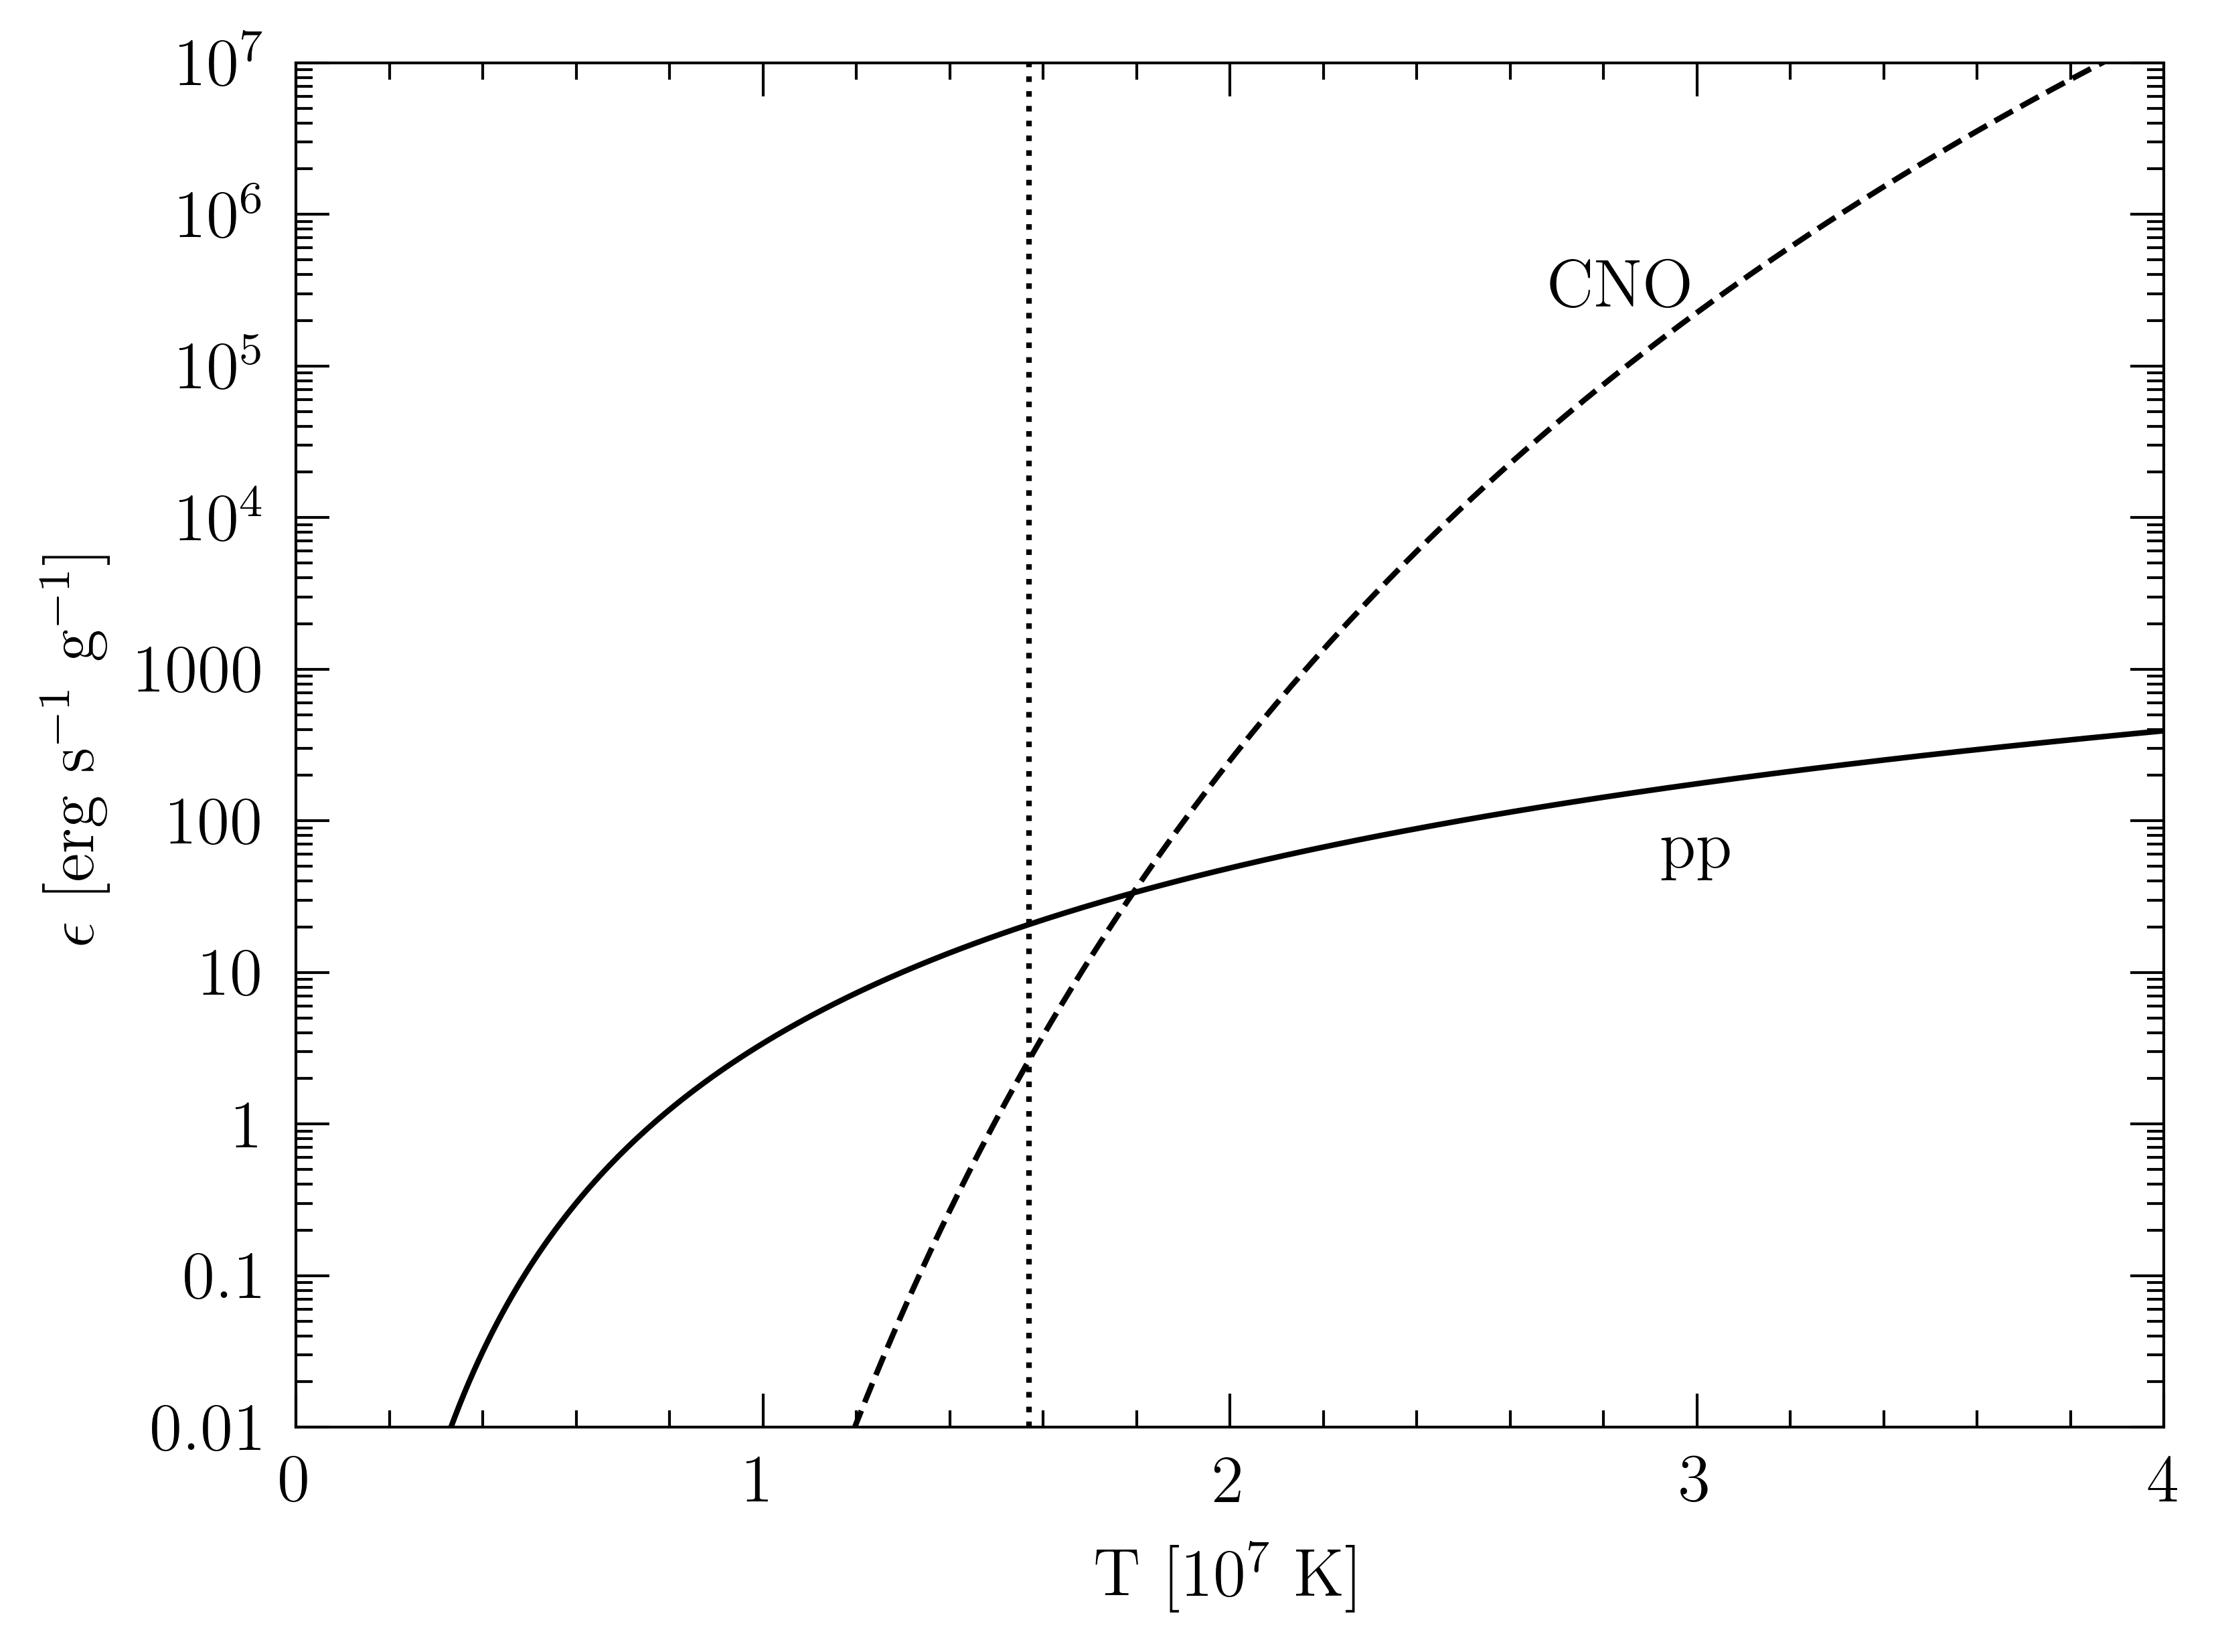

In [6]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

# limits

minT = 0.0
maxT = 0.1*maxT6
minR = 0.01 # energy generation rate in erg s^-1 g^-1
maxR = 1.0e7

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top=True,right=True)
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top=True,right=True)

ax.set_xlim(minT,maxT)
ax.set_xlabel(r'T [10$^7$ K]')
ax.xaxis.set_major_locator(MultipleLocator(1.0))
ax.xaxis.set_minor_locator(MultipleLocator(0.2))

ax.set_ylim(minR,maxR)
ax.set_yscale('log')
ax.set_ylabel(r'$\epsilon$ [erg s$^{-1}$ g$^{-1}$]')
ax.yaxis.set_major_locator(LogLocator(base=10.0,subs=(1.0,),numticks=100))
ax.yaxis.set_minor_locator(LogLocator(base=10.0,subs=np.arange(2,10)*0.1,numticks=100))
ax.yaxis.set_minor_formatter(NullFormatter())
ax.set_yticks([0.01,0.1,1.,10.,100.,1.0e3,1.0e4,1.0e5,1.0e6,1.0e7])
ax.set_yticklabels(['0.01','0.1','1','10','100','1000','10$^{4}$','10$^{5}$','10$^{6}$','10$^{7}$'])

ax.plot(0.1*T6,pp,'-',color='black',lw=1)
ax.plot(0.1*T6,cno,'--',color='black',lw=1)

# Temperature at the center of the sun

ax.vlines(0.1*T6sun,minR,maxR,ls=[':'],color=['black'],lw=1)

# Label the plot

ax.text(3.,100.,'pp',color='black',fontsize=axisFontSize,va='top',ha='center')
ax.text(3.,2.0e5,'CNO',color='black',fontsize=axisFontSize,ha='right',va='bottom')

# Make the plot

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')